# Linear Regression from scratch
## Introduction

Linear Regression is a fundamental algorithm in machine learning and statistics. It models the relationship between a dependent variable (target) and one or more independent variables (features) using a linear equation.

### Problem Statement
Let's use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. The units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

# **Step 01**
- Import Necessary Libraries for this Lab 01

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# **Step 02**
 - Create your x_train and y_train variables.The data is stored in one-dimensional NumPy arrays.

In [8]:
size = [1.0, 2.0]
price = [300., 500.]
x_train = np.array(size)
y_train = np.array(price)
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

x_train: [1. 2.]
y_train: [300. 500.]


### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [11]:
m = x_train.shape[0]
print(f"x_train.shape: {m}")

x_train.shape: 2


One can also use the Python `len()` function as shown below.

In [14]:
m = len(x_train)
print(f"x_train.shape: {m}")

x_train.shape: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [17]:
print(f"(x^(0), y^(0) = {x_train[0],y_train[0]}")
print(f"(x^(1), y^(1) = {x_train[1],y_train[1]}")

(x^(0), y^(0) = (1.0, 300.0)
(x^(1), y^(1) = (2.0, 500.0)


### **Using Loop**

In [21]:
for i in range(m):
    print(f"(x^({i}), y^({i}) = {x_train[i], y_train[i]}")

(x^(0), y^(0) = (1.0, 300.0)
(x^(1), y^(1) = (2.0, 500.0)


You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below.
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

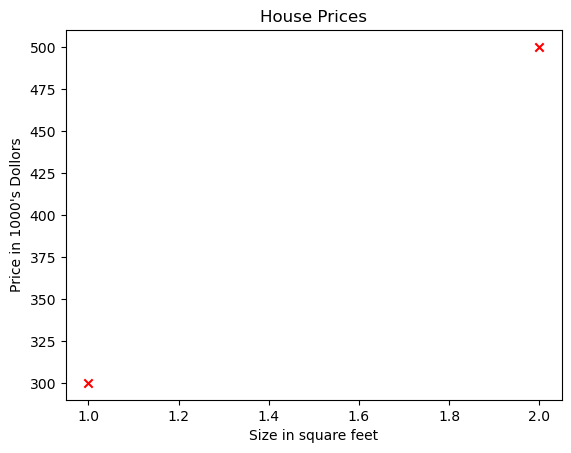

In [24]:
plt.scatter(x_train, y_train, marker = "x", color = "r")
plt.title("House Prices")
plt.xlabel("Size in square feet")
plt.ylabel("Price in 1000's Dollors")
plt.show()

### **Alternative way of above plot**

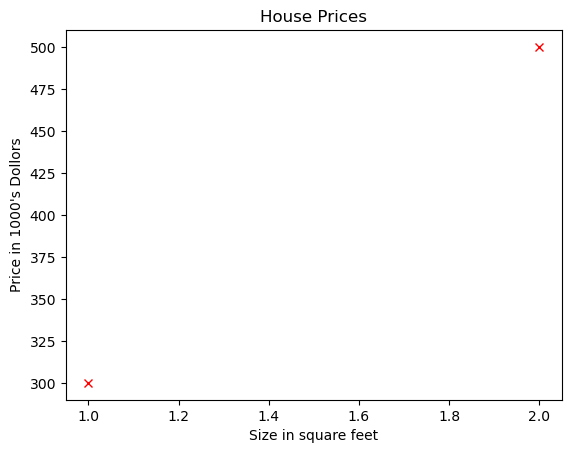

In [27]:
plt.plot(x_train, y_train, "xr")
plt.title("House Prices")
plt.xlabel("Size in square feet")
plt.ylabel("Price in 1000's Dollors")
plt.show()

## Model function
The model function for linear regression (which is a function that maps from (`x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

In [32]:
w = 100
b = 100
print(f"w: {w}, b: {b}")

w: 100, b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [34]:
def compute_model_output(x, w, b):
    m = len(x)
    f_wb = np.zeros(m)
    for i in range(0,m):
        f_wb[i] = w * x[i] + b
    return f_wb

### **Alternative way**

In [37]:
def compute_model_output(x, w, b):
    f_wb = w * x + b
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

Model output: [200. 300.]



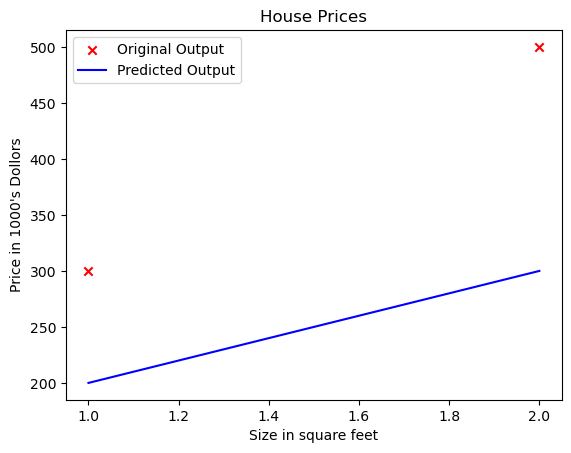

In [40]:
temp_f_wb = compute_model_output(x_train, w, b)
print(f"Model output: {temp_f_wb}\n")

plt.scatter(x_train, y_train, marker = "x", color = "r", label = "Original Output")
plt.plot(x_train, temp_f_wb, c = "b", label = "Predicted Output")
plt.title("House Prices")
plt.xlabel("Size in square feet")
plt.ylabel("Price in 1000's Dollors")
plt.legend()
plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data.
### Challenge
We'll try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

Model output: [300. 500.]



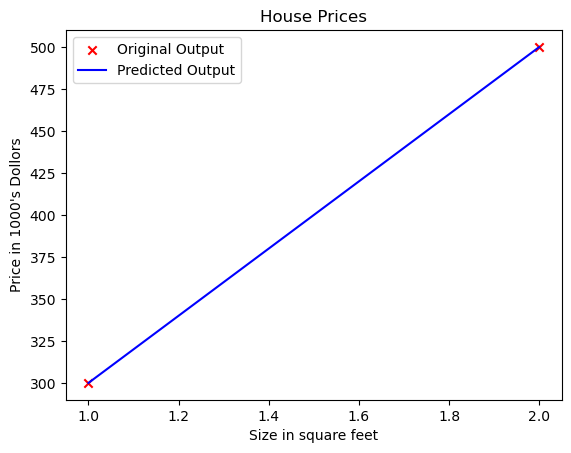

In [44]:
w = 200
b = 100
temp_f_wb = compute_model_output(x_train, w, b)
print(f"Model output: {temp_f_wb}\n")

plt.scatter(x_train, y_train, marker = "x", color = "r", label = "Original Output")
plt.plot(x_train, temp_f_wb, c = "b", label = "Predicted Output")
plt.title("House Prices")
plt.xlabel("Size in square feet")
plt.ylabel("Price in 1000's Dollors")
plt.legend()
plt.show()

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [47]:
x = 1.2
pred = compute_model_output(x, w, b)
print(f"${pred} thousands dollars")

$340.0 thousands dollars


# Cost Function

In [52]:
def compute_model_output(x, w, b):
    f_wb = w * x + b
    return f_wb

x = 1.5
pred = compute_model_output(x, w, b)
print(f"${pred} thousands dollars")

$400.0 thousands dollars


## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [60]:
def compute_cost(x, y, w, b, m):
    m = len(x)
    cost = 0
    for i in range(0,m):
        loss = (compute_model_output(x[i], w, b) - y[i] ) ** 2 / 2 * m
        cost += loss
    return cost

In [66]:
mse = compute_cost(x_train, y_train, w, b, m)
print(f"Cost Rate: {int(mse)}")  #cost is x=zero cause our model is perfectly fit

Cost Rate: 0


# Gradient Descent for Linear Regression

In [72]:
def compute_model_output(x, w, b):
    f_wb = w * x + b
    return f_wb

x = 1.2
pred = compute_model_output(x, w, b)
print(f"${pred} thousands dollars")

$340.0 thousands dollars


In [74]:
def compute_cost(x, y, w, b):
    m = len(x)
    cost = 0
    for i in range(0,m):
        loss = (compute_model_output(x[i], w, b) - y[i] ) ** 2 / 2 * m
        cost += loss
    return cost

msse = compute_cost(x_train, y_train, w, b)
print(f"Cost Rate: {int(msse)}")

Cost Rate: 0


<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$
![Local](images/grad.png) 
</br>
![Local]('images/grad2.png)

## Implement Gradient Descent
Lt's implement gradient descent algorithm for one feature. You will need three functions.
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [88]:
def compute_gradient(x, y, w, b):
    m = len(x_train)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = compute_model_output(x[i], w, b)
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    return dj_dw, dj_db

In [90]:
dw, db = compute_gradient(x_train, y_train, 200, 100)
print(f"dw: {dw}, db: {db}")

dw: 0.0, db: 0.0


In [92]:
def gradient_descent(x, y, w, b, alpha, num_iters, compute_grad):
    for i in range(num_iters):
        w -= alpha*compute_grad[0]
        b -= alpha*compute_grad[1]
        return w, b

In [94]:
grad = gradient_descent(x_train, y_train, 200, 100, 0.1, 10, (dw, db))
print(f"Gradient Descent: {grad}")

Gradient Descent: (200.0, 100.0)


In [96]:
def gradient_descent(x, y, w, b, alpha, num_iters, compute_cost, compute_grad):
    J_history = []
    P_history = []
    for i in range(num_iters):
        dj_dw, dj_db  = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 10000:
            J_history.append(compute_cost(x, y, w, b))
            P_history.append([w,b])
        if i% math.ceil(num_iters/20) == 0:
            print(f"\t\t\t\t\t\t\titeration {i:4}\ncost: {J_history[-1]}",
            f"\tdj_dw: {dj_dw}, \t\tdj_db: {dj_db}",
            f"\tw: {w},\t b:{b}")
            print("========================================================================================================================================================")
    return w, b, J_history, P_history

In [335]:
import math
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, 
                                                    compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:.2f},{b_final:.2f})")

							iteration    0
cost: 317099.25 	dj_dw: -650.0, 		dj_db: -400.0 	w: 6.5,	 b:4.0
							iteration  500
cost: 28.318041243474948 	dj_dw: -0.534713385741469, 		dj_db: 0.8651455609634979 	w: 192.67562022511058,	 b:111.85108446847413
							iteration 1000
cost: 13.65004372766167 	dj_dw: -0.3712293911791278, 		dj_db: 0.6006617725498984 	w: 194.91482409389593,	 b:108.2279874548482
							iteration 1500
cost: 6.579681559419709 	dj_dw: -0.25773759366074955, 		dj_db: 0.4170281867215522 	w: 196.46945788096426,	 b:105.71253714731284
							iteration 2000
cost: 3.1715802738152705 	dj_dw: -0.17894237030935756, 		dj_db: 0.28953483718788675 	w: 197.5488109193384,	 b:103.96610724536305
							iteration 2500
cost: 1.5287854499360272 	dj_dw: -0.12423632671172413, 		dj_db: 0.2010185992568836 	w: 198.29818546087893,	 b:102.7535937668466
							iteration 3000
cost: 0.7369149604164072 	dj_dw: -0.0862549481608994, 		dj_db: 0.13956343782209046 	w: 198.81846212990547,	 b:101.91176843280807
							iteratio

# Another Example

#### Importing Necessary Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### Loading Dataset
- Look here we have two features, before we had a single feature. That's important to notice.

In [38]:
df = pd.read_csv("data.txt", header = None, names =  ["Area", "Old", "Price"])
df.head()

,Area,Old,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Min-Max Scaling

In [41]:
df['Area'] = (df['Area'] - df['Area'].min()) / (df['Area'].max() - df['Area'].min())
df['Old'] = (df['Old'] - df['Old'].min()) / (df['Old'].max() - df['Old'].min())
df['Price'] = (df['Price'] - df['Price'].min()) / (df['Price'].max() - df['Price'].min())

In [43]:
df.head()

,Area,Old,Price
0,0.345284,0.50,0.433962
1,0.206288,0.50,0.301887
2,0.426917,0.50,0.375660
3,0.155543,0.25,0.117170
4,0.592388,0.75,0.698113


### Identifing the target and labels

In [46]:
x_train = df[["Area", "Old"]]
y_train = df["Price"]

### Visulization
- Let's visulize the dataset in 3D now, as we've 3Dimentions now

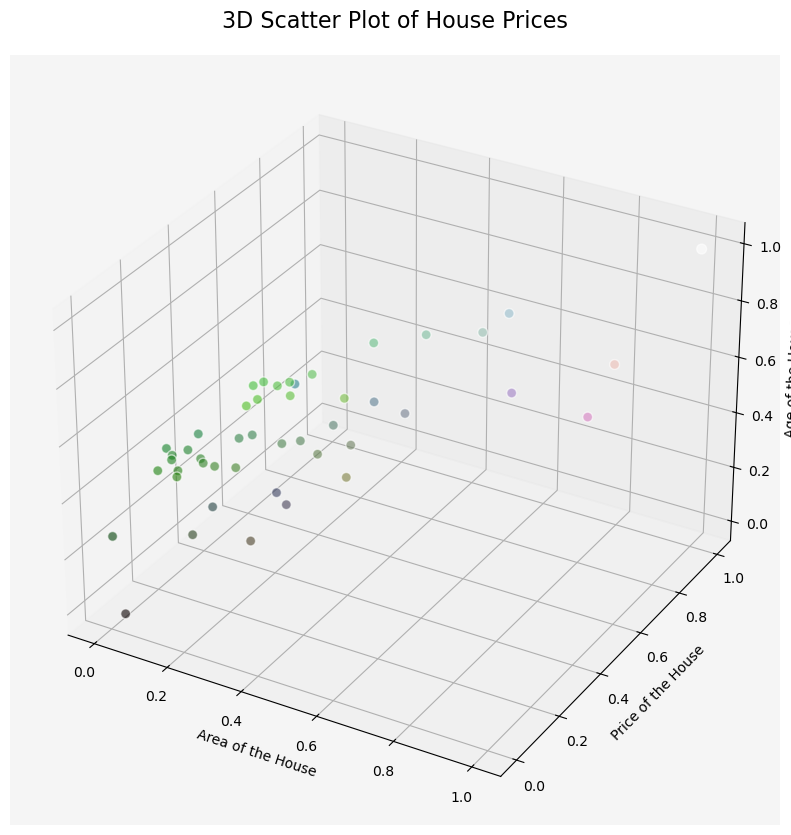

In [49]:
plt.figure(figsize = (15, 10))
ax = plt.axes(projection = '3d')

x = df["Area"]
y = df["Price"]
z = df["Old"]

ax.scatter(x, y, z, c=df, marker='o', s=50, alpha=0.6, edgecolors='w', depthshade=True)
ax.set_xlabel("Area of the House")
ax.set_ylabel("Price of the House")
ax.set_zlabel("Age of the House")

# Set title
ax.set_title("3D Scatter Plot of House Prices", fontsize=16, pad=20)

# Customize the grid and background
ax.grid(True)
ax.set_facecolor('whitesmoke')

plt.show()

### Initializing the weights and bias, Initialing before the gradient descent

In [52]:
w = np.array([0.5, 0.5])
b = 1
print(f"w: {w}")
print(f"b: {b}")

w: [0.5 0.5]
b: 1


### Function to Compute the model output

In [55]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(w, x.iloc[i,:]) + b
        
    return f_wb

### Visulizing the Dataset with the regression, as the we have two features we'll have a straing line that will do prediction of the unseen data.

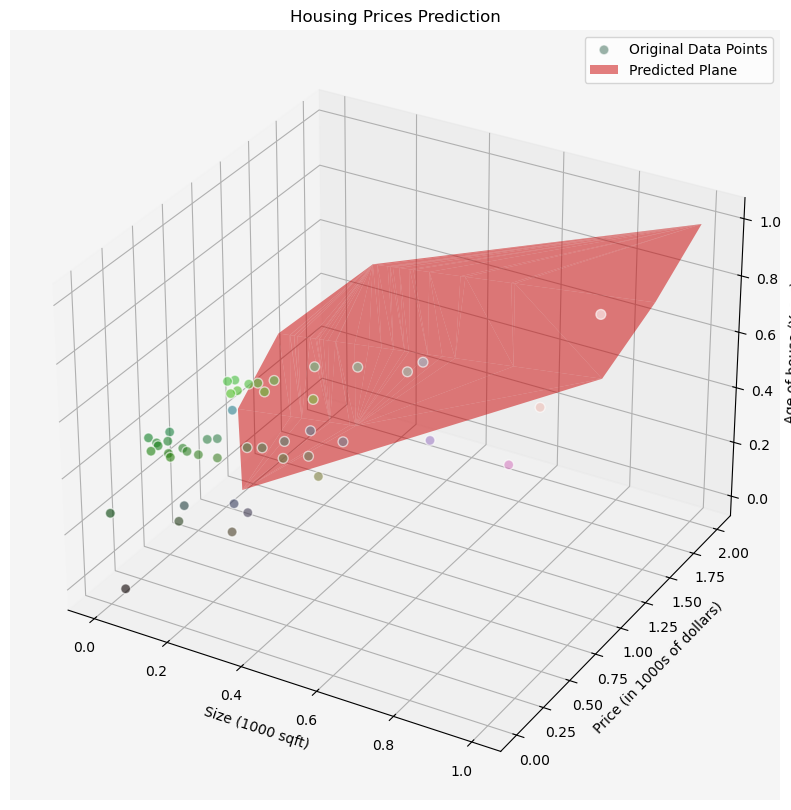

In [58]:
plt.figure(figsize = (10, 10))
tmp_f_wb = compute_model_output(x_train, w, b,)
# Plot our model prediction
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z, c=df, marker='o', s=50, alpha=0.6, edgecolors='w', depthshade=True, label = "Original Data Points")
ax.plot_trisurf(x, tmp_f_wb, z, color='red', alpha=0.5, linewidth=0.5, edgecolor='none', label = "Predicted Plane")
# Set the title
plt.title("Housing Prices Prediction")
# Set the y-axis label
ax.set_ylabel('Price (in 1000s of dollars)')
ax.set_xlabel('Size (1000 sqft)')
ax.set_zlabel('Age of house (Years)')

# Customize the grid and background
ax.grid(True)
ax.set_facecolor('whitesmoke')
plt.legend()
plt.show()

### Function to compute the cost, as also call it `residual` in term of meachine learning

In [61]:
def compute_cost(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    
    # Initialize the sum of the costs
    cost_sum = 0
    
    # Loop over each training example
    for i in range(m):
        # Compute the prediction for the i-th example
        f_wb = np.dot(w, x.iloc[i,:]) + b
        
        # Compute the squared error for the i-th example
        cost = (f_wb - y[i]) ** 2
        
        # Accumulate the total cost
        cost_sum += cost
    
    # Compute the mean squared error cost
    total_cost = (1 / (2 * m)) * cost_sum
    
    return total_cost

- Let's see how much cost we have here

In [64]:
compute_cost(x_train, tmp_f_wb, w, b)

0.0

In [66]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    
    # Initialize the gradients
    dj_dw = 0
    dj_db = 0
    
    # Loop over each training example
    for i in range(m):
        # Compute the prediction for the i-th example
        f_wb = np.dot(w, x.iloc[i,:]) + b
        
        # Compute the gradient of the cost w.r.t. w and b for the i-th example
        dj_dw_i = (f_wb - y[i]) * x.iloc[i,:]
        dj_db_i = f_wb - y[i]
        
        # Accumulate the gradients
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    # Compute the average gradient
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [68]:
dj_dw, dj_db = compute_gradient(x_train, compute_model_output(x_train, w, b), w, b)
print(f"Gradient w.r.t. w: \n{dj_dw}")
print(f"Gradient w.r.t. b: {dj_db}")

Gradient w.r.t. w: 
Area    0.0
Old     0.0
Name: 0, dtype: float64
Gradient w.r.t. b: 0.0


### Why `0`? Curious? Just go down and you'll know why

In [74]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(w, x.iloc[i, :]) + b
    return f_wb

### Gradient Descent

In [72]:
import math

def gradient_descent(x, y, w, b, alpha, num_iters, compute_cost, compute_gradient):
    J_history = []
    P_history = []
    for i in range(num_iters):
        dj_dw, dj_db  = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 10000:a
            J_history.append(compute_cost(x, y, w, b))
            P_history.append([w, b])
        if i % math.ceil(num_iters / 20) == 0:
            print(f"Iteration {i:4}: Cost: {J_history[-1]:.4f}, dj_dw: {dj_dw}, dj_db: {dj_db}, w: {w}, b: {b}")
            print("=" * 100)
    return w, b, J_history, P_history

# Example usage
# Initialize parameters
w_init = np.zeros(x_train.shape[1])  # Initialize w as a zero array with the same number of features as x_train
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, 
                                                    compute_cost, compute_gradient)
print(f"(w, b) found by gradient descent: ({w_final}, {b_final})")


Iteration    0: Cost: 0.0774, dj_dw: Area   -0.145187
Old    -0.193979
Name: 0, dtype: float64, dj_db: -0.32172199919710964, w: Area    0.001452
Old     0.001940
Name: 0, dtype: float64, b: 0.0032172199919710963
Iteration  500: Cost: 0.0170, dj_dw: Area   -0.025958
Old    -0.003291
Name: 0, dtype: float64, dj_db: 0.010208414164041526, w: Area    0.224584
Old     0.154519
Name: 0, dtype: float64, b: 0.17694768485309603
Iteration 1000: Cost: 0.0138, dj_dw: Area   -0.020947
Old    -0.001477
Name: 0, dtype: float64, dj_db: 0.007891323370957343, w: Area    0.341181
Old     0.165945
Name: 0, dtype: float64, b: 0.1314920212790978
Iteration 1500: Cost: 0.0118, dj_dw: Area   -0.017038
Old    -0.000255
Name: 0, dtype: float64, dj_db: 0.005886974450162347, w: Area    0.435752
Old     0.170108
Name: 0, dtype: float64, b: 0.09727102405105972
Iteration 2000: Cost: 0.0104, dj_dw: Area   -0.013926
Old     0.000631
Name: 0, dtype: float64, dj_db: 0.004339982200140127, w: Area    0.512855
Old     0.1690

### See at the cost, it's so much low, means the model is fitted good, that's the reason the cost was zero previous